In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
print("Shape of Train Set: {}".format(train.shape))
print("Shape of Test Set: {}".format(test.shape))

Shape of Train Set: (8523, 12)
Shape of Test Set: (5681, 11)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Checking Statistics for Numerical Features

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Checking Statistics for Categorical Features 

In [8]:
train.describe(include=['O'])          #To select pandas categorical columns, pass include=['O'] as describe() arg.

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### Checking for Null Values in Train Set

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

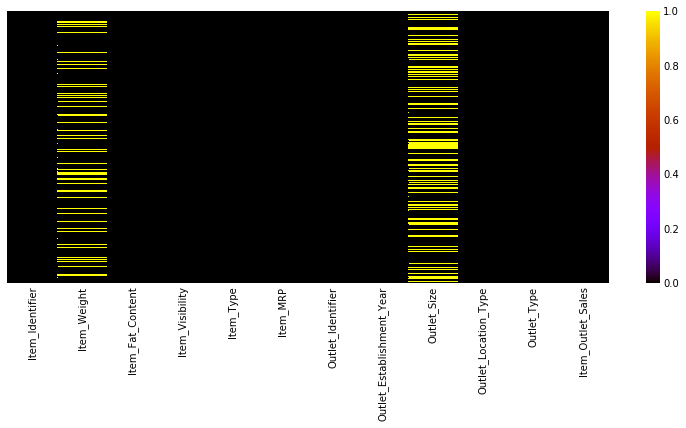

In [10]:
plt.figure(figsize=(12, 5))
sns.heatmap(train.isnull(), yticklabels=False, cmap="gnuplot")

### Checking for Null Values in Test Set

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Item_Weight and Outlet_Size have missing values in both the Train & Test sets.

### Correlation among features. 

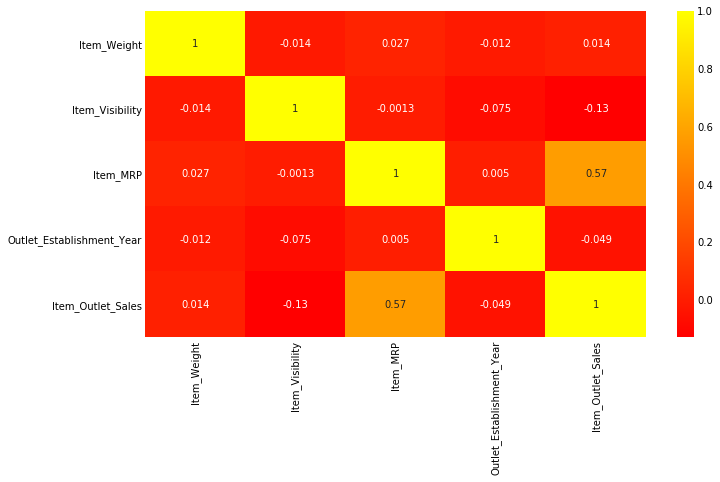

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='autumn')

In [13]:
train.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

# Exploratory Data Analysis

## Univariate Analysis

### Feature: Item_Outlet_Sales 

In [14]:
train['Item_Outlet_Sales'].count()

8523

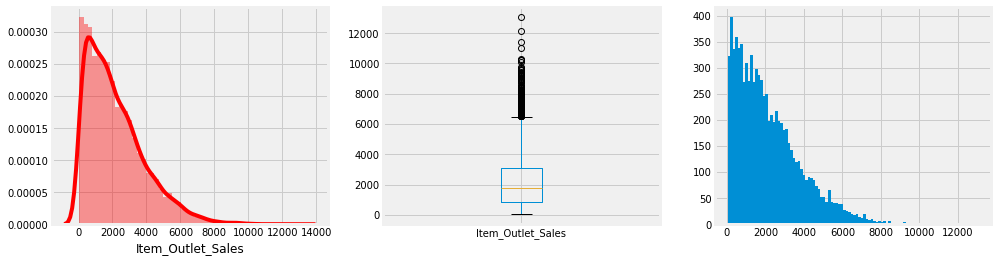

In [15]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.distplot(train['Item_Outlet_Sales'], color='red')

plt.subplot(1, 3, 2)
#sns.violinplot(train['Item_Outlet_Sales'], orient="v")
#sns.boxplot(train['Item_Outlet_Sales'], orient="v")
train['Item_Outlet_Sales'].plot.box()

plt.subplot(1, 3, 3)
train['Item_Outlet_Sales'].hist(bins = 100)

#### The distribution of the Item_Outlet_Sales is not Normally distributed and it also projects the presence of some outliers. It is right skewed.

### ------- Categorical Features ------- 

### Feature:  Item_Identifier

In [16]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDX04     9
NCF42     9
FDF56     9
FDF52     9
FDX20     9
FDO19     9
NCY18     9
NCQ06     9
FDT07     9
FDQ40     9
FDW26     9
FDV38     9
NCL31     9
NCB18     9
NCJ30     9
FDG09     9
FDP25     9
FDX31     9
FDW49     9
DRE49     9
FDD38     9
FDV60     9
NCI54     9
DRN47     9
FDU12     9
FDL10     8
DRA59     8
FDZ21     8
         ..
DRL59     2
FDM16     2
FDE39     2
FDR03     2
FDP15     2
DRC24     2
FDE38     2
FDB10     2
FDI36     2
FDA48     2
NCM42     2
DRG25     2
FDW10     2
FDB47     2
FDZ50     2
FDF38     2
FDU43     2
NCX53     2
FDW58     2
NCC55     2
NCW05     2
FDO33     1
FDE52     1
FDC23     1
FDN52     1
FDY43     1
FDT35     1
FDQ60     1
DRF48     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

### Feature:  Item_Fat_Content

In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

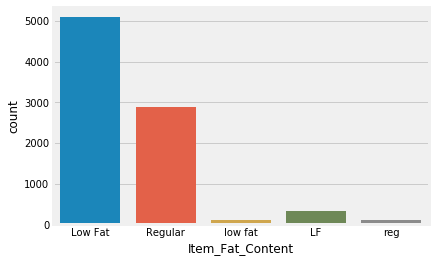

In [18]:
sns.countplot(train['Item_Fat_Content'])

#### From the above figure, 'Low Fat', 'LF' and 'low fat'; 'Regular' & 'reg' are same and needs to be replaced.

In [19]:
train['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)

In [20]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
train['Item_Fat_Content'].value_counts(normalize=True)*100

Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64

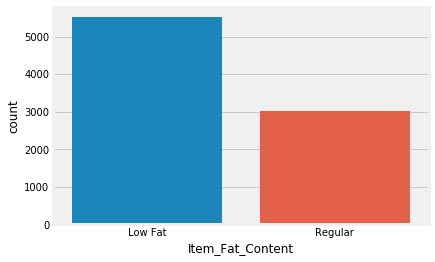

In [22]:
sns.countplot(train['Item_Fat_Content'])

#### Almost 65% items have low fat content

### Feature: Item_Type

In [23]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
train['Item_Type'].value_counts(normalize=True)*100

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

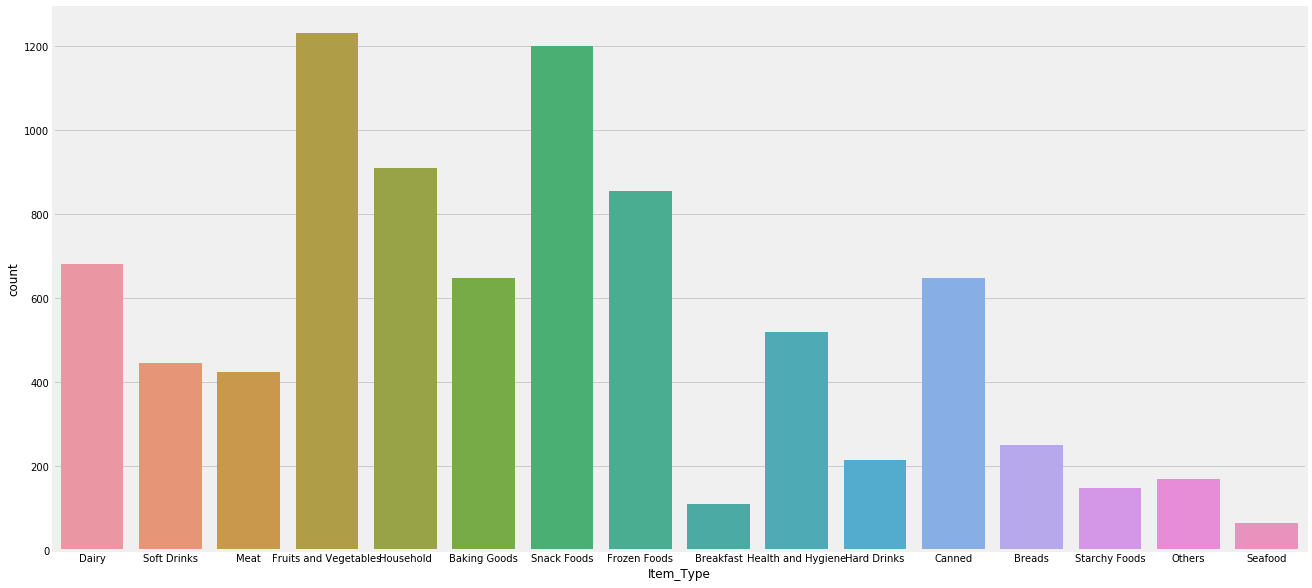

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(train['Item_Type'])

#### 'Fruits and Vegetables', 'Snack Foods', ' Household' & 'Frozen Foods' constitute highest number of Item_Type; while 'Seafood' is the lowest.

### Feature: Outlet_Identifier

In [26]:
train['Outlet_Identifier'].value_counts(normalize=True)*100

OUT027    10.970316
OUT013    10.935117
OUT035    10.911651
OUT046    10.911651
OUT049    10.911651
OUT045    10.899918
OUT018    10.888185
OUT017    10.864719
OUT010     6.511792
OUT019     6.195002
Name: Outlet_Identifier, dtype: float64

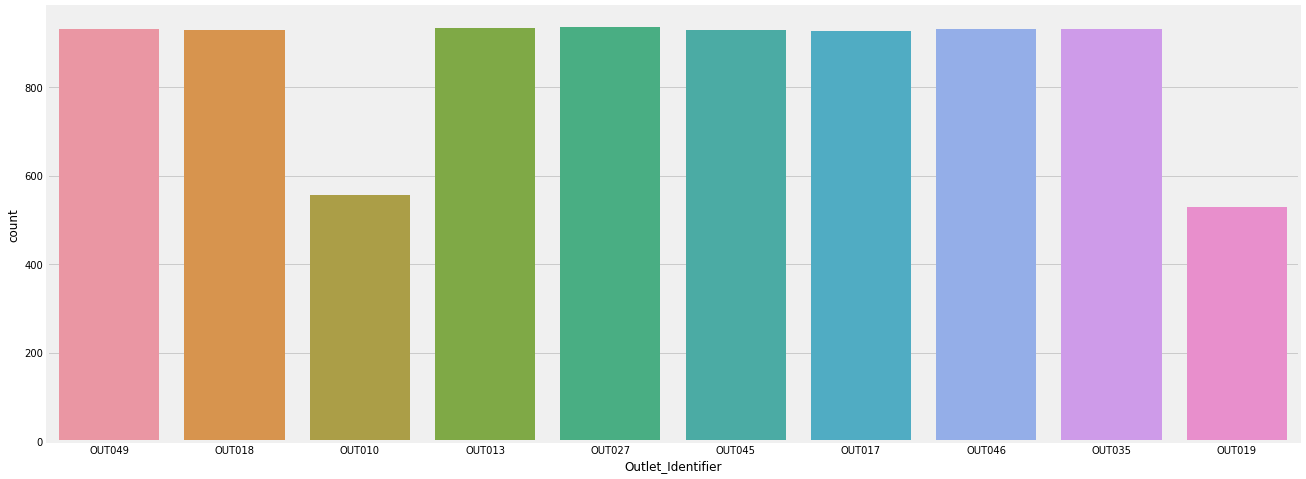

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(train['Outlet_Identifier'])

#### 'OUT027' & 'OUT013' records the highest Sales while 'OUT019' has the lowest Sales.

### Feature: Outlet_Size

In [28]:
train['Outlet_Size'].value_counts(normalize=True)*100

Medium    45.689514
Small     39.064289
High      15.246197
Name: Outlet_Size, dtype: float64

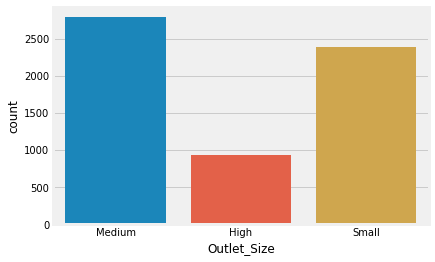

In [29]:
sns.countplot(train['Outlet_Size'])

#### Most outlets are 'Medium' sized outlets. 

### Feature: Outlet_Location_Type

In [30]:
train['Outlet_Location_Type'].value_counts(normalize=True)*100

Tier 3    39.305409
Tier 2    32.676288
Tier 1    28.018303
Name: Outlet_Location_Type, dtype: float64

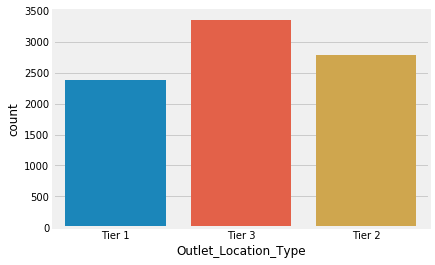

In [31]:
sns.countplot(train['Outlet_Location_Type'])

#### 'Tier 3' Outlet_Location_Type has most outlets.

### Feature: Outlet_Type

In [32]:
train['Outlet_Type'].value_counts(normalize=True)*100

Supermarket Type1    65.434706
Grocery Store        12.706793
Supermarket Type3    10.970316
Supermarket Type2    10.888185
Name: Outlet_Type, dtype: float64

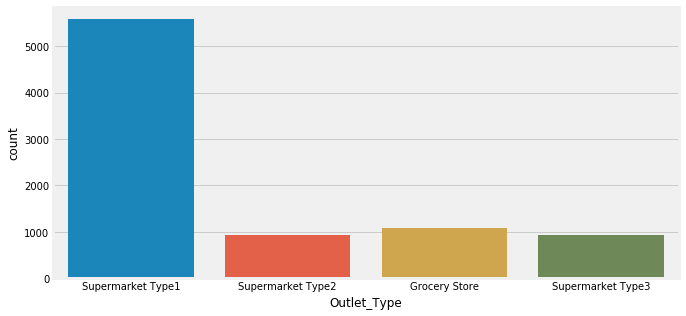

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Type'])

#### 'Supermarket Type1' has the maximum outlets while 'Supermarket Type2' has minimum. 

### ------- Numerical Features ------- 

### Feature: Item_Weight

In [34]:
print("No of Observations: {}".format(train['Item_Weight'].count()))
print("No of Unique Observations: {}".format(train['Item_Weight'].nunique()))

No of Observations: 7060
No of Unique Observations: 415


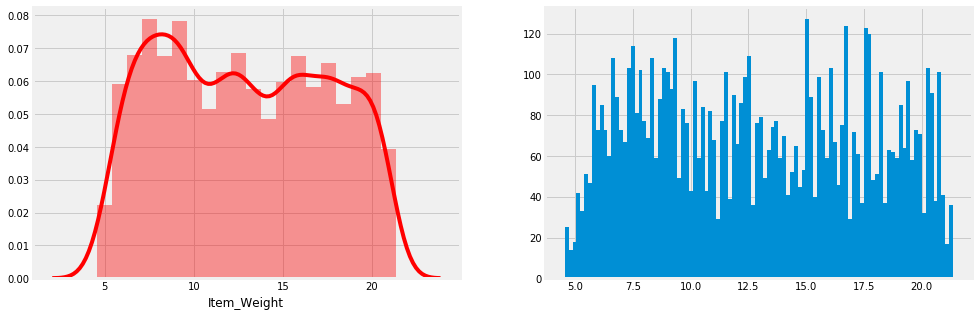

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
a = train['Item_Weight'].dropna()
sns.distplot(a, color='red')

plt.subplot(1, 2, 2)
train['Item_Weight'].hist(bins = 100);

#### There seems to be no clear-cut pattern in Item_Weight 

### Feature: Item_Visibility

In [36]:
print("No of Observations: {}".format(train['Item_Visibility'].count()))
print("No of Unique Observations: {}".format(train['Item_Visibility'].nunique()))

No of Observations: 8523
No of Unique Observations: 7880


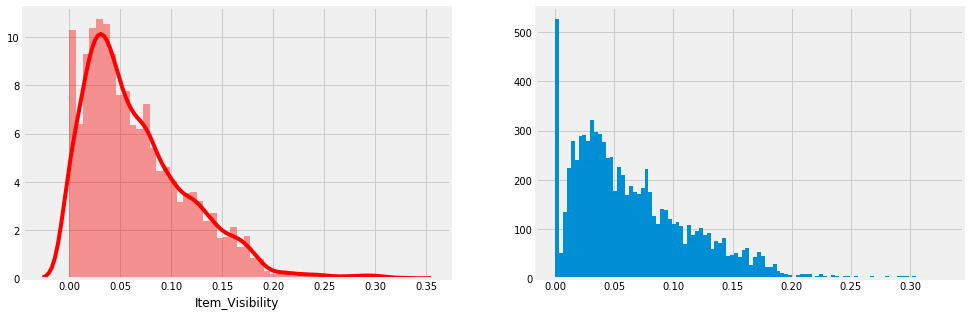

In [37]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
#a = train['Item_Visibility'].dropna()
sns.distplot(train['Item_Visibility'], color='red')

plt.subplot(1, 2, 2)
train['Item_Visibility'].hist(bins = 100);

#### Item_Visibility is right-skewed and should be transformed to curb its skewness. 0 visibility is also noticed.

### Feature: Item_MRP

In [38]:
print("No of Observations: {}".format(train['Item_MRP'].count()))
print("No of Unique Observations: {}".format(train['Item_MRP'].nunique()))

No of Observations: 8523
No of Unique Observations: 5938


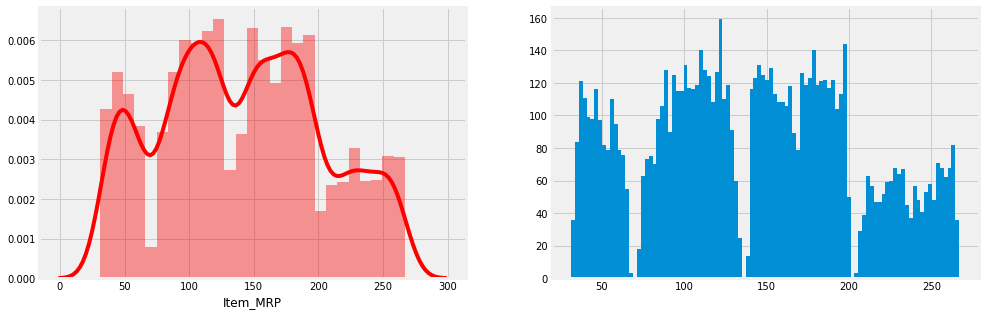

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(train['Item_MRP'], color='red')

plt.subplot(1, 2, 2)
train['Item_MRP'].hist(bins = 100);

#### 4 different distributions can be observed for Item_MRP.

### Feature: Outlet_Establishment_Year

In [40]:
print("No of Observations: {}".format(train['Outlet_Establishment_Year'].count()))
print("No of Unique Observations: {}".format(train['Outlet_Establishment_Year'].nunique()))

No of Observations: 8523
No of Unique Observations: 9


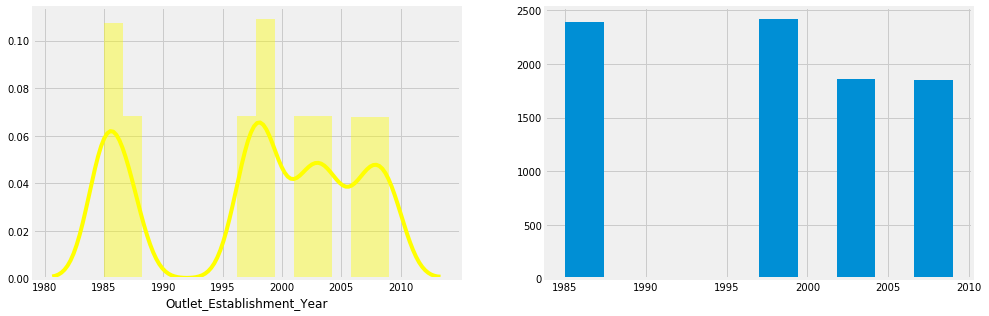

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(train['Outlet_Establishment_Year'], color='yellow')

plt.subplot(1, 2, 2)
train['Outlet_Establishment_Year'].hist();

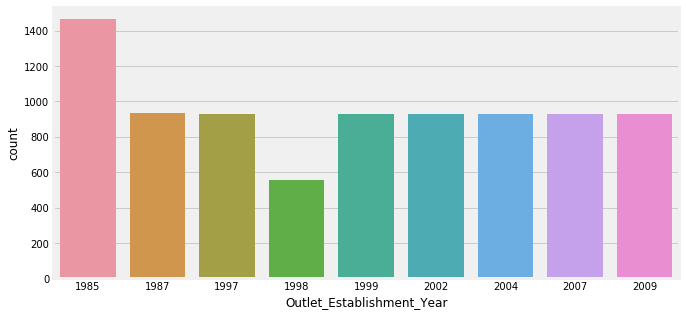

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(train['Outlet_Establishment_Year'])

In [43]:
train['Outlet_Establishment_Year'].value_counts(normalize=True)*100

1985    17.165317
1987    10.935117
1999    10.911651
1997    10.911651
2004    10.911651
2002    10.899918
2009    10.888185
2007    10.864719
1998     6.511792
Name: Outlet_Establishment_Year, dtype: float64

#### Most outlets seem to be quite old with respect to today as they have been established in the year 1985. However, about 40% of outlets have been established in or after 2002. So they are relatively new ones. 

## Bivariate Analysis 

### ---- Numerical Variables Vs Target Variables ----

#### Item_Weight Vs Item_Outlet_Sales 

In [44]:
#train.pivot_table(index = 'Item_Weight', values = 'Item_Outlet_Sales', aggfunc=np.sum)

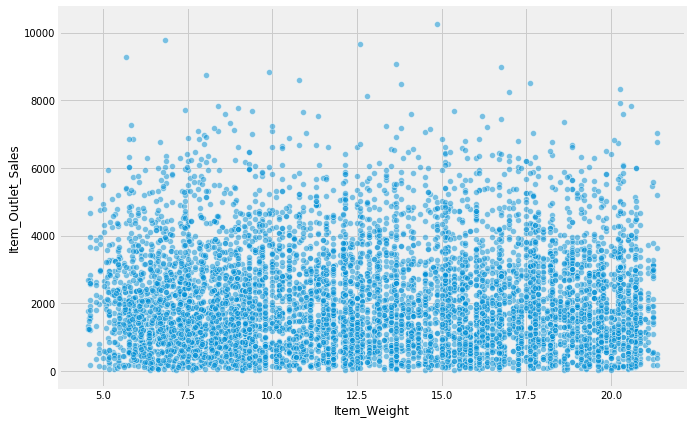

In [45]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = train, alpha = 0.5)

#### Item_Outlet_Sales is well spread across the entire range of the Item_Weight. But no distinct pattern can be observed.

#### Item_MRP Vs Item_Outlet_Sales 

In [46]:
#train.pivot_table(index = 'Item_MRP', values = 'Item_Outlet_Sales', aggfunc=np.sum)

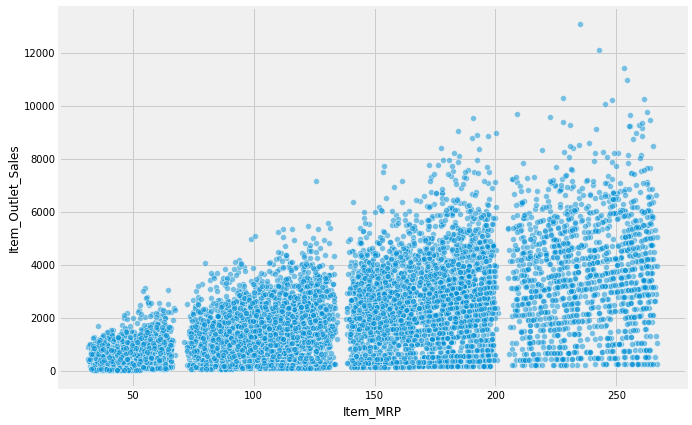

In [47]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = train, alpha = 0.5)

#### The Item_MRP seems to form distinct groups of prices. 

### Item_Visibility Vs Item_Outlet_Sales

In [48]:
#train.pivot_table(index = 'Item_Visibility', values = 'Item_Outlet_Sales', aggfunc=np.sum)

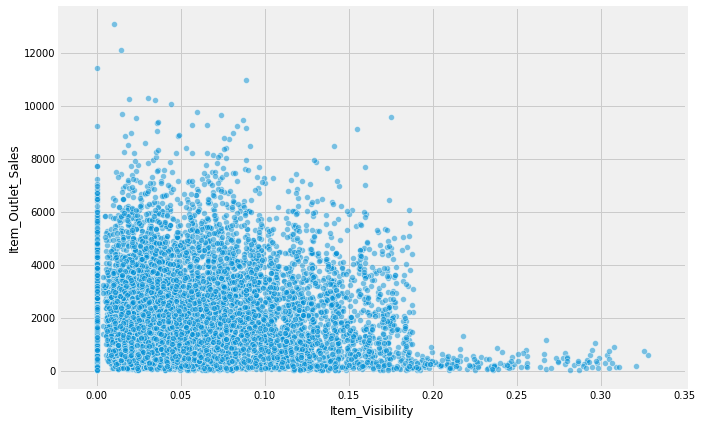

In [49]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train, alpha = 0.5)

#### There are few observations at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. To be dealt later.

### ---- Categorical Variables Vs Target Variables ---- 

### Item_Fat_Content Vs Item_Outlet_Sales

Text(0, 0.5, 'Item_Outlet_Sales')

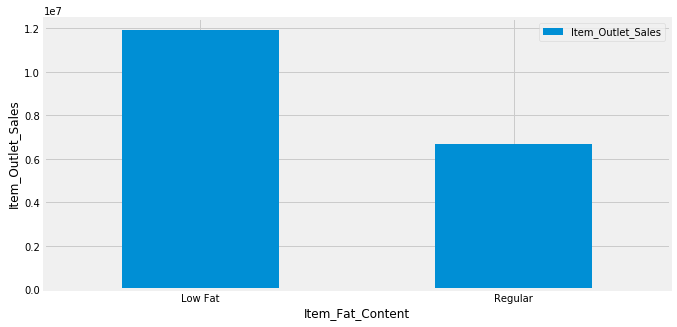

In [50]:
# ifc = pd.crosstab(train['Item_Fat_Content'], train['Item_Outlet_Sales'])
# print(ifc)

ifc = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
ifc

ifc.plot(kind="bar", stacked=False, figsize=(10,5), rot=0)
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")

#### Low Fat items tend to have more impact on Item_Outlet_Sales

### Item_Type Vs Item_Outlet_Sales 

Text(0, 0.5, 'Item_Outlet_Sales')

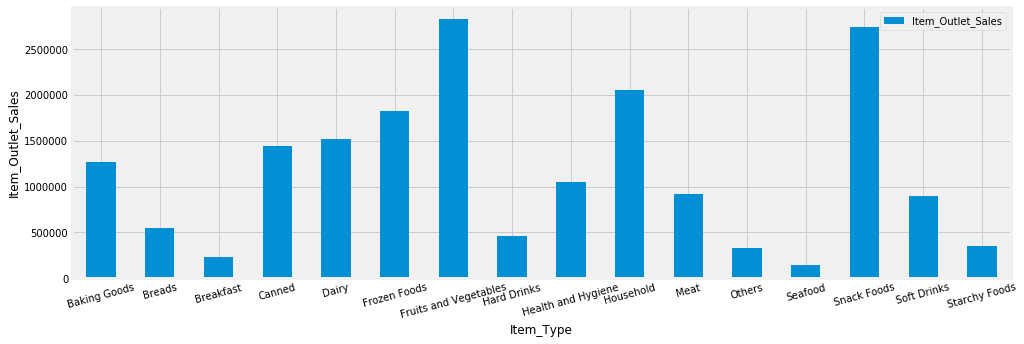

In [51]:
it = train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.sum)

it.plot(kind="bar", stacked=False, figsize=(15,5), rot=15)
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")

#### "Fruits and Vegetables"  & "Snack Food" is the highest sales item.

### Outlet_Identifier Vs Item_Outlet_Sales  

In [52]:
oi = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.sum)
oi

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


Text(0, 0.5, 'Item_Outlet_Sales')

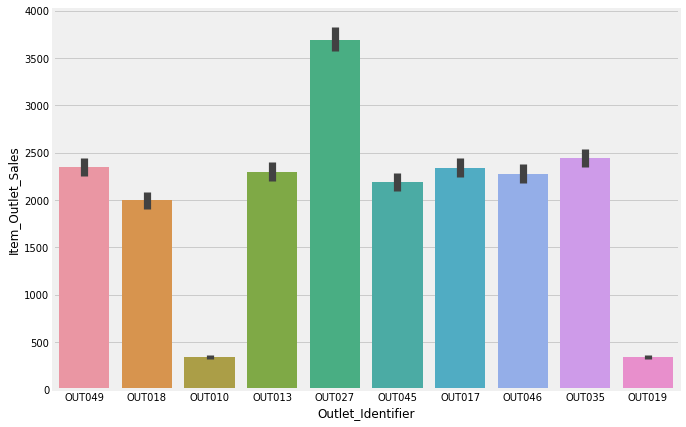

In [53]:
#oi.plot(kind="bar", stacked=False, figsize=(15,5), rot=15)
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train)
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")

#### OUT027 has maximum sales while OUT010 has minimum sales. 

### Outlet_Size Vs Item_Outlet_Sales 

In [54]:
os = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.sum)
os

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


Text(0, 0.5, 'Item_Outlet_Sales')

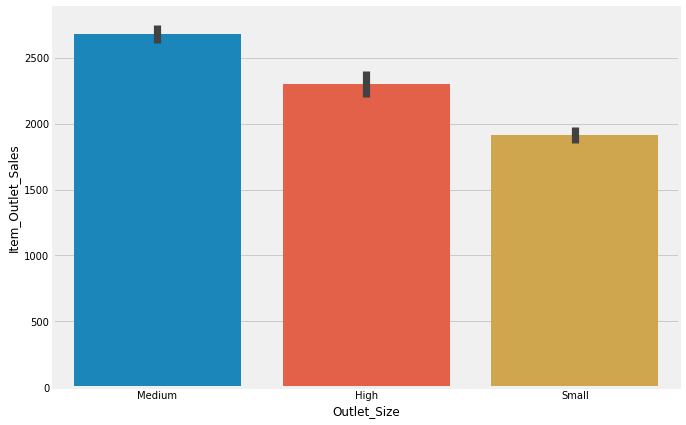

In [55]:

plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")

#### Medium sized outlets tend to sell more while Small sized ones tend to sell the least 

### Outlet_Location_Type Vs Item_Outlet_Sales 

In [56]:
olt = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.sum)
olt

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,4.482059e+06
Tier 2,6.472314e+06
Tier 3,7.636753e+06


Text(0, 0.5, 'Item_Outlet_Sales')

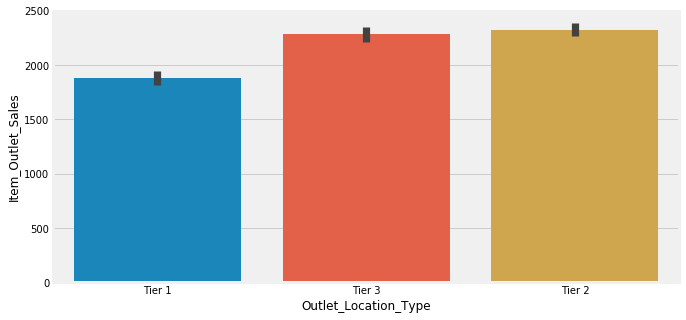

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")

#### Tier 2 Outlet_Location_Type are the most contributors for sales, while Tier 1 the least. 

### Outlet_Type Vs Item_Outlet_Sales 

In [58]:
ot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.sum)
ot

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,3.680343e+05
Supermarket Type1,1.291734e+07
Supermarket Type2,1.851823e+06
Supermarket Type3,3.453926e+06


Text(0, 0.5, 'Item_Outlet_Sales')

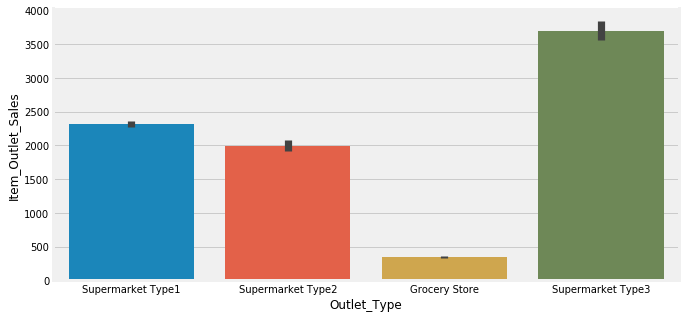

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")

#### Supermarket Type3 contributes maximum to Item_Outlet_Sales, while "Grocery Store" type of outlet contributes minimum to Item_Outlet_Sales.

## Null value treatment 

In [60]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Item_Weight is numerical and Outlet_Size is categorical and both have null values in both train and test set.

### --- Outlet_Size --- 

In [62]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [63]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [64]:
train['Outlet_Size'].fillna('Medium', inplace = True)
test['Outlet_Size'].fillna('Medium', inplace = True)

### --- Item_Weight ---

In [65]:
train['Item_Weight'].mean()

12.857645184136183

In [66]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

In [67]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [68]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### No more null values in Train & Test set 

### Replacement of '0' in Item_Visibility feature. 

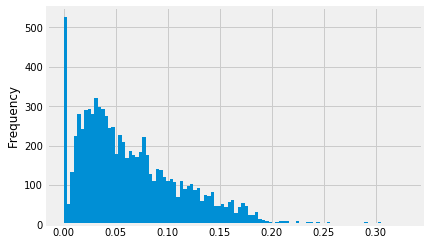

In [69]:
train['Item_Visibility'].plot.hist(bins=100)

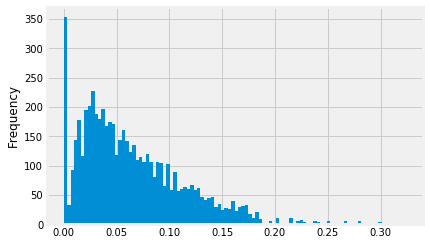

In [70]:
test['Item_Visibility'].plot.hist(bins=100)

#### The zeroes in Item_Visibility feature can be replaced with Item_Visibility wise means of the values which are not equal to zero.

In [71]:
m = train[train['Item_Visibility']!=0]['Item_Visibility'].mean()
m

0.07048184085069421

In [72]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00, m)

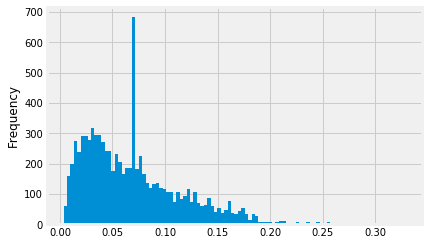

In [73]:
## We even change the zeros for the Test set as well.

train['Item_Visibility'].plot.hist(bins=100)

In [74]:
mt = test[test['Item_Visibility']!=0]['Item_Visibility'].mean()
mt
test['Item_Visibility'] = test['Item_Visibility'].replace(0.00, mt)

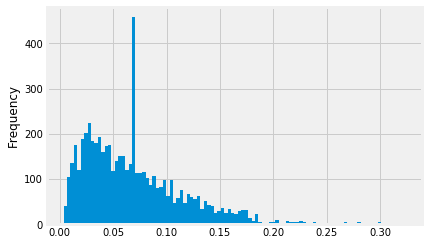

In [75]:
test['Item_Visibility'].plot.hist(bins=100)

## Handling Skewness 

In [76]:
# Applying log transformation can help in making a Normal distribution for the concerned feature.
# 'Item_Visibility' is present in both the train and test sets and so it is log - transformed in both the sets.

#train['Item_Visibility'] = np.log(train['Item_Visibility']+1)
#test['Item_Visibility'] = np.log(test['Item_Visibility']+1)

train['Item_Visibility'] = np.log(train['Item_Visibility'])
test['Item_Visibility'] = np.log(test['Item_Visibility'])

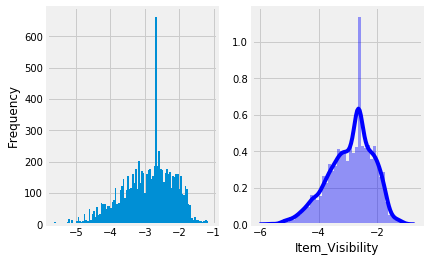

In [77]:
# Plotting distribution plots to check whether the log transformation has been able to generate a normal distribution.

plt.subplot(1, 2, 1)
train['Item_Visibility'].plot.hist(bins=100)
plt.subplot(1, 2, 2)
sns.distplot(train['Item_Visibility'], color='blue')

#### 'Item_Visibility' now have a more or less bell shaped curve indicating a normal distribution, after they have been log transformed.

## Feature Engineering

### Item_Type 

#### There are too many features in this 'Item_Type' feature which needs to be reduced. A new feature  'Item_Type_new' is created after classifying the categories of 'Item_Type' into two groups - perishable and non_perishable comodities (assumption). 

In [78]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [79]:
# Distributing the 'Item_Typre' into two lists of Perishable & Non - Perishable goods. All the "Item_Type" are classified
# into the 2 lists. Only 'Others' is left out -- that can be labelled as 'not_sure' category in the code below.

perishable = ["Fruits and Vegetables", "Snack Foods", "Dairy", "Meat", "Breads", "Starchy Foods", "Breakfast", "Seafood"]
non_perishable = ["Household", "Frozen Foods", "Canned", "Baking Goods", "Health and Hygiene", "Soft Drinks", "Hard Drinks"]

In [80]:
## Treatment of Train Set

item_list =[] 
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')

train['Item_Type_new'] = item_list


In [81]:
## Treatment of Test Set

item_list_te =[] 
for i in test['Item_Type']:
    if i in perishable:
        item_list_te.append('perishable')
    elif (i in non_perishable):
        item_list_te.append('non_perishable')
    else:
        item_list_te.append('not_sure')

test['Item_Type_new'] = item_list_te

#### We create a new feature -  'Item_category', which are categorical variables derived from the Item_Identifier feature. 

In [82]:
#The Item_Identifier has the categories either starting with 'DR', 'FD' or 'NC'. So, these 3 are taken as 3 categories.
# Regex is applied to categorise the feature properly, before replacing with the 3 categories mentioned above.


# train['Item_Category'] = train['Item_Identifier'].apply(lambda x: x[0:2])  <-- THIS ALSO WORKS.
# test['Item_Category'] = test['Item_Identifier'].apply(lambda x: x[0:2])

train['Item_Category'] = train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)
test['Item_Category'] = test['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [83]:
food = pd.crosstab(train['Item_Type'], train['Item_Category'])
food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


#### For Item_Fat_Content, wherever the value is ‘NC’ (Non Consumable), we change the values to 'Non Edible' as non - consumables can not have fat in it.

In [84]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'
test['Item_Fat_Content'][(test['Item_Category']=='NC')]='Non Edible'

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [86]:
# A new feature is created - 'Age_Of_Store_In_Yrs' (years of operation). It is created by subtracting 
# the Outlet_Establishment_Year from the present year, i.e 2020. 
# This new feature is created for both the test & train sets.


train['Age_Of_Store_In_Yrs'] = 2020-train['Outlet_Establishment_Year']
test['Age_Of_Store_In_Yrs'] = 2020-test['Outlet_Establishment_Year']

In [87]:
# Earlier in the Item_MRP vs Item_Outlet_Sales plot, it was observed that Item_MRP was spread across in 4 groups. Now 
# a label is assigned to each of these groups and this label is used as a new variable. Range of values have been taken 
# into account and classified into FOUR groups - 1, 2, 3, 4.


def clusters(x):
    if x<69:
        return '1'
    elif x in range(69,136):
        return '2'
    elif x in range(136,203):
        return '3'
    else:
        return '4'

train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
test['Item_MRP_Clusters'] = test['Item_MRP'].astype('int').apply(clusters)


In [88]:
train['Item_MRP_Clusters'].unique()

array(['4', '1', '3', '2'], dtype=object)

In [89]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_Category,Age_Of_Store_In_Yrs,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,-4.132215,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,21,4
1,DRC01,5.92,Regular,-3.948780,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable,DR,11,1
2,FDN15,17.50,Low Fat,-4.088756,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,21,3
3,FDX07,19.20,Regular,-2.652400,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable,FD,22,3
4,NCD19,8.93,Non Edible,-2.652400,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable,NC,33,1


In [90]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_new,Item_Category,Age_Of_Store_In_Yrs,Item_MRP_Clusters
0,FDW58,20.750000,Low Fat,-4.884245,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,perishable,FD,21,2
1,FDW14,8.300000,reg,-3.258977,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,perishable,FD,13,2
2,NCN55,14.600000,Non Edible,-2.306845,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,not_sure,NC,22,4
3,FDQ58,7.315000,Low Fat,-4.174142,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,perishable,FD,13,3
4,FDY38,12.695633,Regular,-2.132005,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,perishable,FD,35,4


In [91]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Type_new                0
Item_Category                0
Age_Of_Store_In_Yrs          0
Item_MRP_Clusters            0
dtype: int64

In [92]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Type_new                0
Item_Category                0
Age_Of_Store_In_Yrs          0
Item_MRP_Clusters            0
dtype: int64

In [93]:
train.shape

(8523, 16)

In [94]:
test.shape

(5681, 15)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 16 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Type_new                8523 non-null object
Item_Category                8523 non-null object
Age_Of_Store_In_Yrs          8523 non-null int64
Item_MRP_Clusters            8523 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 1.0+ MB


In [96]:
test['Item_MRP_Clusters'].value_counts()

3    1933
2    1910
4     971
1     867
Name: Item_MRP_Clusters, dtype: int64

## Label Encoding 

### Ordinal features, i.e Categorical features which has some order are more suitable for Label Encoding. For the rest of categorical features - Nominal, Dummy Encoding via the use of dummy variables is better.

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])  #<--- Ordinal features
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

# train['Outlet_Identifier']= le.fit_transform(train['Outlet_Identifier'])
# test['Outlet_Identifier']= le.fit_transform(test['Outlet_Identifier'])

train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])   #<--- Ordinal features
test['Outlet_Size']= le.fit_transform(test['Outlet_Size'])

train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])   #<--- Ordinal features
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

train['Item_MRP_Clusters']= le.fit_transform(train['Item_MRP_Clusters'])   #<--- Ordinal features
test['Item_MRP_Clusters']= le.fit_transform(test['Item_MRP_Clusters'])


# train['Outlet_Type']= le.fit_transform(train['Outlet_Type'])
# test['Outlet_Type']= le.fit_transform(test['Outlet_Type'])

# train['Item_Type_new']= le.fit_transform(train['Item_Type_new'])
# test['Item_Type_new']= le.fit_transform(test['Item_Type_new'])

# train['Item_Category']= le.fit_transform(train['Item_Category'])
# test['Item_Category']= le.fit_transform(test['Item_Category'])


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 16 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Type_new                8523 non-null object
Item_Category                8523 non-null object
Age_Of_Store_In_Yrs          8523 non-null int64
Item_MRP_Clusters            8523 non-null int32
dtypes: float64(4), int32(4), int64(2), object(6)
memory usage: 932.3+ KB


In [99]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_Category,Age_Of_Store_In_Yrs,Item_MRP_Clusters
0,FDA15,9.30,0,-4.132215,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,perishable,FD,21,3
1,DRC01,5.92,2,-3.948780,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,non_perishable,DR,11,0
2,FDN15,17.50,0,-4.088756,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,perishable,FD,21,2
3,FDX07,19.20,2,-2.652400,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,perishable,FD,22,2
4,NCD19,8.93,1,-2.652400,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,non_perishable,NC,33,0


In [100]:
train.shape

(8523, 16)

In [101]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_new,Item_Category,Age_Of_Store_In_Yrs,Item_MRP_Clusters
0,FDW58,20.750000,1,-4.884245,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,perishable,FD,21,1
1,FDW14,8.300000,5,-3.258977,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,perishable,FD,13,1
2,NCN55,14.600000,2,-2.306845,Others,241.7538,OUT010,1998,1,2,Grocery Store,not_sure,NC,22,3
3,FDQ58,7.315000,1,-4.174142,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,perishable,FD,13,2
4,FDY38,12.695633,3,-2.132005,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,perishable,FD,35,3


In [102]:
test.shape

(5681, 15)

#### Now the Features that has been transformed to new features are dropped in both Train & Test sets to make things a bit easy. 

In [103]:
# Features "Item_Identifier" & "Item_Outlet_Sales" are not dropped presently.

train = train.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1)
test = test.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1)

In [104]:
train.shape

(8523, 14)

In [105]:
test.shape

(5681, 13)

## --- Dummy Encoding --- 

### 'Outlet_Identifier', 'Outlet_Type', 'Item_Type_new' and 'Item_Category' are not Ordinal Categorical Features. So, these four features are dummy-encoded in the cell below.

In [106]:
# train = pd.get_dummies(train, columns = ['Item_Fat_Content','Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_new','Item_Category','Item_MRP_Clusters'])
# test = pd.get_dummies(test, columns = ['Item_Fat_Content','Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_new','Item_Category','Item_MRP_Clusters'])

train = pd.get_dummies(train, columns = ['Outlet_Identifier', 'Outlet_Type','Item_Type_new','Item_Category'])
test = pd.get_dummies(test, columns = ['Outlet_Identifier', 'Outlet_Type','Item_Type_new','Item_Category'])


In [107]:
train.shape

(8523, 30)

In [108]:
test.shape

(5681, 29)

In [109]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age_Of_Store_In_Yrs,Item_MRP_Clusters,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,FDA15,9.30,0,-4.132215,249.8092,1,0,3735.1380,21,3,...,0,1,0,0,0,0,1,0,1,0
1,DRC01,5.92,2,-3.948780,48.2692,1,2,443.4228,11,0,...,0,0,1,0,1,0,0,1,0,0
2,FDN15,17.50,0,-4.088756,141.6180,1,0,2097.2700,21,2,...,0,1,0,0,0,0,1,0,1,0
3,FDX07,19.20,2,-2.652400,182.0950,1,2,732.3800,22,2,...,1,0,0,0,0,0,1,0,1,0
4,NCD19,8.93,1,-2.652400,53.8614,0,2,994.7052,33,0,...,0,1,0,0,1,0,0,0,0,1


In [110]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Age_Of_Store_In_Yrs,Item_MRP_Clusters,Outlet_Identifier_OUT010,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,FDW58,20.750000,1,-4.884245,107.8622,1,0,21,1,0,...,0,1,0,0,0,0,1,0,1,0
1,FDW14,8.300000,5,-3.258977,87.3198,1,1,13,1,0,...,0,1,0,0,0,0,1,0,1,0
2,NCN55,14.600000,2,-2.306845,241.7538,1,2,22,3,1,...,1,0,0,0,0,1,0,0,0,1
3,FDQ58,7.315000,1,-4.174142,155.0340,1,1,13,2,0,...,0,1,0,0,0,0,1,0,1,0
4,FDY38,12.695633,3,-2.132005,234.2300,1,2,35,3,0,...,0,0,0,1,0,0,1,0,1,0


In [111]:
        # train = pd.concat([train, train_dum], axis = 1)
        # test = pd.concat([test, test_dum], axis = 1)

In [112]:
#"Item_Identifier" is stored in this variable for creating submission file, later.
test_Item_Identifier = test['Item_Identifier']  

In [113]:
test_Item_Identifier.head(3)

0    FDW58
1    FDW14
2    NCN55
Name: Item_Identifier, dtype: object

In [114]:
## Now, 'Item_Identifier' feature is dropped from both the Train and Test sets, as it doesn't look so important for
## model training. Moreover, 'Item_Category' feature has been derived from 'Item_Identifier'.

train = train.drop(['Item_Identifier'], axis = 1)
test = test.drop(['Item_Identifier'], axis = 1)

In [115]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age_Of_Store_In_Yrs,Item_MRP_Clusters,Outlet_Identifier_OUT010,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,9.30,0,-4.132215,249.8092,1,0,3735.1380,21,3,0,...,0,1,0,0,0,0,1,0,1,0
1,5.92,2,-3.948780,48.2692,1,2,443.4228,11,0,0,...,0,0,1,0,1,0,0,1,0,0


In [116]:
test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Age_Of_Store_In_Yrs,Item_MRP_Clusters,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,20.75,1,-4.884245,107.8622,1,0,21,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,8.30,5,-3.258977,87.3198,1,1,13,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [117]:
train.shape

(8523, 29)

In [118]:
test.shape

(5681, 28)

## Model Building 

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [120]:
X_train = train.drop('Item_Outlet_Sales',axis = 1)
y_train = train['Item_Outlet_Sales']

In [121]:
X_train.shape

(8523, 28)

In [122]:
y_train.shape

(8523,)

### Linear Regression 

In [123]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

mse = mean_squared_error(y_train, linreg.predict(X_train))
rmse = np.sqrt(mse)
rmse

1127.4280308768919

In [124]:
#CROSS VALIDATION

cross_mse = cross_val_score(linreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

1131.2517468391293

### SVR 

In [125]:
svr = LinearSVR()
svr.fit(X_train, y_train)

mse = mean_squared_error(y_train, svr.predict(X_train))
rmse = np.sqrt(mse)
rmse

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1205.609633161325

In [126]:
#CROSS VALIDATION

cross_mse = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

1223.83429531128

### RandomForestRegressor

In [127]:
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=100, n_jobs=-1)
rf.fit(X_train, y_train)

mse = mean_squared_error(y_train, rf.predict(X_train))
rmse = np.sqrt(mse)
rmse

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1064.4199128711534

In [128]:
#CROSS VALIDATION

cross_mse = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

1090.3809062599378

### KNeighborsRegressor

In [129]:
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
knn.fit(X_train, y_train)

mse = mean_squared_error(y_train, knn.predict(X_train))
rmse = np.sqrt(mse)
rmse

1070.11815103292

In [130]:
#CROSS VALIDATION

cross_mse = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

1208.242273828869

### Decision Tree 

In [131]:
dtree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dtree.fit(X_train, y_train)

mse = mean_squared_error(y_train, dtree.predict(X_train))
rmse = np.sqrt(mse)
rmse

1060.1313460640313

In [132]:
# #CROSS VALIDATION

cross_mse = cross_val_score(dtree, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

1099.2299037168202

#### The Decision Tree Regressor is chosen due to its low cross validation score. 

In [133]:
#final_prediction = dtree.predict(test)
final_prediction = rf.predict(test)

In [134]:
final_prediction

array([1572.29554066, 1339.03310297,  581.05262695, ..., 1944.91294587,
       3595.2910189 , 1255.97561658])

In [135]:
submission = pd.DataFrame({
    "Item_Identifier": test_Item_Identifier,
    "Item_Outlet_Sales": final_prediction
})

submission.head()

,Item_Identifier,Item_Outlet_Sales
0,FDW58,1572.295541
1,FDW14,1339.033103
2,NCN55,581.052627
3,FDQ58,2333.472556
4,FDY38,5826.341538
